# Overview

In this project I want to develop my own model that can peform K Means Clustering.

To judge how well my model works, I will benchmark it against SK Learn's peformance. In particular, I want to see whether my DIY model can:
- find the same coordinates of the final centroids as sklearn, for a given value of k
- achieve the same error score for the clusters as sklearn (note - this would follow from the above bullet point, if two sets of centroids are exactly the same)

For this project, I have decided to focus first on the iris dataset to see whether clustering algorithms can detect the natural categorisations of the iris clusters.

I will then apply my model to another dataset to test its range

# Set up - data and imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.cluster import KMeans

iris = pd.read_csv('Iris.csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.isna().mean()

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [ ]:
len(iris)

150

In [ ]:
iris_X = iris.drop(columns = ['Id', 'Species'])

In [ ]:
#as all datapoints are in the same units, cm, I am not going to peform any normalisation/standardisation

# Using k-means clustering with SKlearn to set benchmarks

In [ ]:
#I want to find out how the value of K affects the sum of square errors (i.e. squares of distance from each data point to its closest centroid )

In [ ]:
data = iris_X

storage = pd.DataFrame({'K':[], 'Sum_sq_error':[]})

centres = []
labels = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, n_init = 10)
  kmeans.fit(data)
  sse = kmeans.inertia_

  centres.append(np.around(kmeans.cluster_centers_,3))
  labels.append(kmeans.labels_)

  row = pd.DataFrame({'K':[k], 'Sum_sq_error':[sse]})
  storage = pd.concat([storage, row], axis = 0)

storage = storage.reset_index(drop = True)

In [ ]:
storage

,K,Sum_sq_error
0,2.0,152.368706
1,3.0,78.940841
2,4.0,57.317873
3,5.0,46.535582
4,6.0,38.930963
5,7.0,34.676974
6,8.0,30.083825
7,9.0,28.119593
8,10.0,25.984764


In [ ]:
#noting the MSE value where K=3

MSE_K_3 = storage.iloc[1,1] / len(iris)

In [ ]:
MSE_K_3

0.5262722761743066

Text(0, 0.5, 'Sum_sq_error')

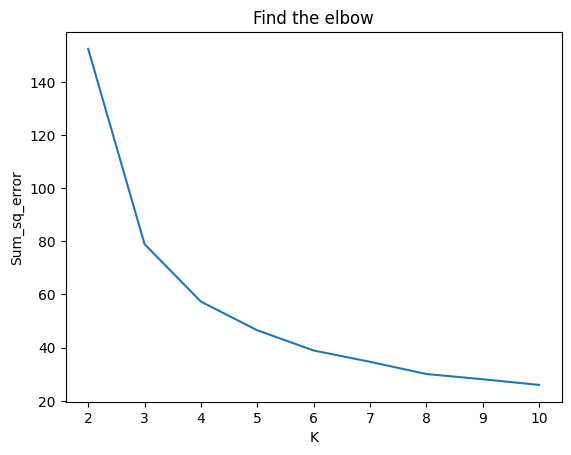

In [ ]:
plt.plot(storage.K, storage.Sum_sq_error)
plt.title('Find the elbow')
plt.xlabel('K')
plt.ylabel('Sum_sq_error')

In [ ]:
#Looking at the graph, both 3 and 4 are good candidates for the best value of K

#This is because as K increases, the SSE is always going to decrease - you can't increase the distance between a point and its nearest centroid by adding
#new centroids - you can only decrease it.

#So we are not looking for the value of K with the lowest SSE, but the value of K for which there are still significant returns compared to the previous
#value of K - the elbow point

#I know that there are 3 species of Iris in the dataset, and 3 is a valid elbow point - so I will focus on K = 3 for this project
#But I am interested in what patterns may be found if K = 4, i.e. subcategories within species

In [ ]:
#initially carry on with K = 3 (will come back to look at K= 4 briefly in a moment)

In [ ]:
labels_k_3 = [str(x) for x in labels[1]]
centres_k_3 = centres[1]

In [ ]:
centres_k_3

array([[6.85 , 3.074, 5.742, 2.071],
       [5.006, 3.418, 1.464, 0.244],
       [5.902, 2.748, 4.394, 1.434]])

In [ ]:
iris_SKLearn = iris.copy(deep = True)

In [ ]:
iris_SKLearn['labels'] = labels_k_3

In [ ]:
iris_SKLearn['labels'].unique()

array(['1', '2', '0'], dtype=object)

In [ ]:
Species = iris_SKLearn['Species'].unique()

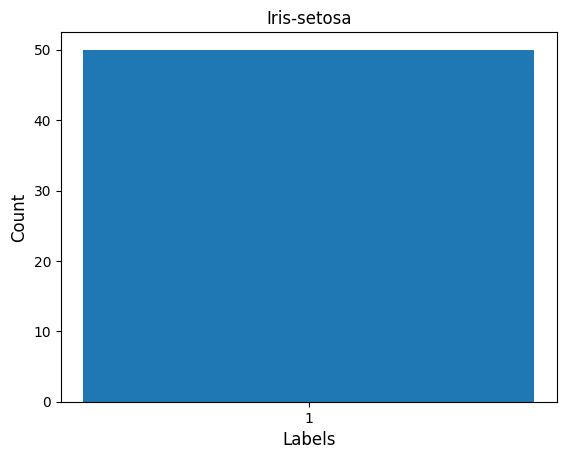

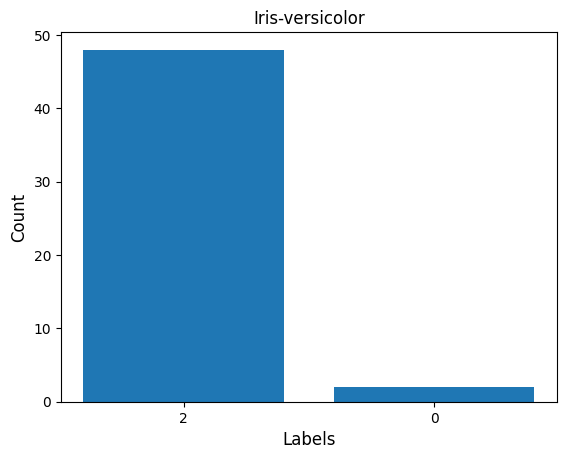

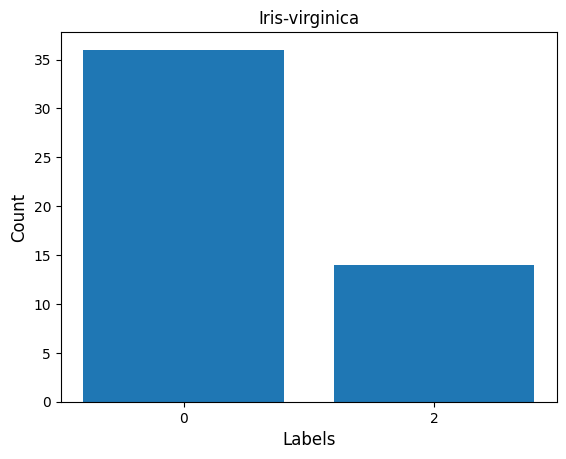

In [ ]:
for sp in Species:

  df = iris_SKLearn[iris_SKLearn['Species']== sp]

  label_count  = df['labels'].value_counts()

  #plt.figure(figsize=(10,5))
  plt.bar(label_count.index, label_count.values)
  plt.title(sp)
  plt.ylabel('Count', fontsize=12)
  plt.xlabel('Labels', fontsize=12)
  plt.show()

In [ ]:
#All iris setosa have been clustered into cluster 1 (and all points in cluser 1 correspond to setosa)

#There is a strong link between iris- versicolour and cluster 2, but some versicolor were clustered into cluster 0
#and some points in cluster 2 correspond to iris virginica

#similar dynamic with iris virginica.

In [ ]:
#I now want to quickly explore the relationships between species and clusters, if there are 4 clusters (compared with 3 species)

In [ ]:
Species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
labels_k_4 = [str(x) for x in labels[2]]
centres_k_4 = centres[2]

iris_SKLearn['labels_4'] = labels_k_4

In [ ]:
iris_SKLearn.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels,labels_4
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1


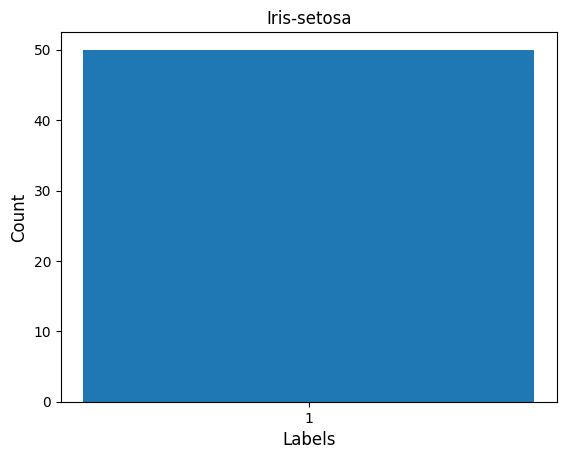

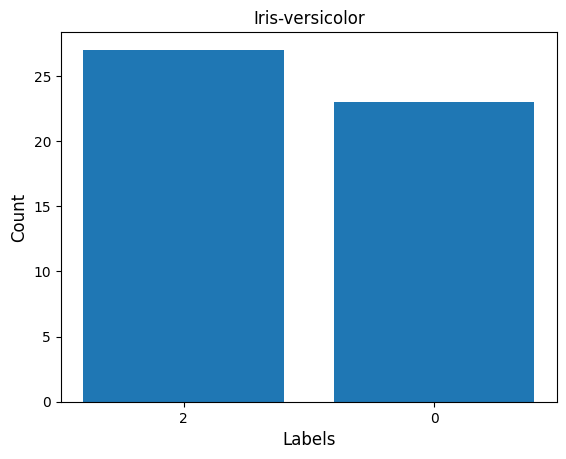

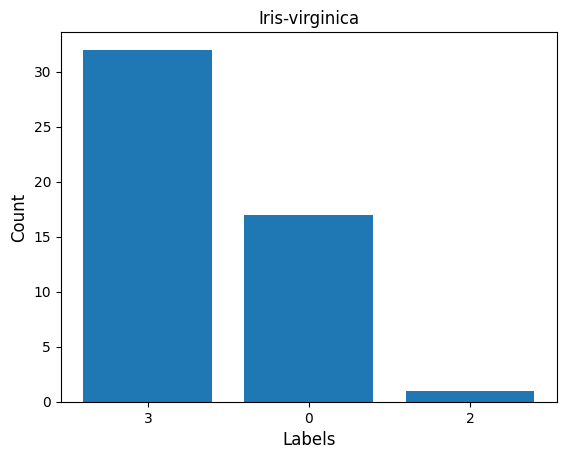

In [ ]:
for sp in Species:

  df = iris_SKLearn[iris_SKLearn['Species']== sp]

  label_count  = df['labels_4'].value_counts()

  #plt.figure(figsize=(10,5))
  plt.bar(label_count.index, label_count.values)
  plt.title(sp)
  plt.ylabel('Count', fontsize=12)
  plt.xlabel('Labels', fontsize=12)
  plt.show()

In [ ]:
#again, iris setosa and cluster 1 have a perfect overlap, suggesting that all iris setosa are very similar and there is
#relatively little room for subdivision (at the scale of clusters we're looking at)

#Iris versicolor's appear to subdivide well into two separate clusters - 0 and 2

#with Iris virginia, the majority of cases are in cluster 3, but there are some cases in 0 and a few in 2 - suggesting some overlap with
#Iris versicolor

In [ ]:
#In the next stage, I will develop my own model and try to emulate the performance of SKLearn
#Notably, I want to achieve the same centroids and the same MSE

In [ ]:
centres_k_3

array([[6.85 , 3.074, 5.742, 2.071],
       [5.006, 3.418, 1.464, 0.244],
       [5.902, 2.748, 4.394, 1.434]])

In [ ]:
MSE_K_3

0.5262722761743066

# DIY Model

In [ ]:
#First I want to create a separate version of the dataset - without the additional columns I previously added, whilst leaving the main dataset as it is
#in case I add columns to this version

In [ ]:
iris_DIY = iris.copy(deep = True)
iris_DIY = iris_DIY.drop(columns = ['Id'])

In [ ]:
iris_DIY_X = iris_DIY.drop(columns = ['Species'])

In [ ]:
iris_DIY_X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#first I want to create a set of functions that I will use (often repeatedly) in my main clustering function

In [ ]:
def get_initial_centroids(df, k):

  mins = df.min()
  maxs = df.max()

  zipped_minmax = list(zip(mins,maxs))

  dictionary = {}

  for i in range(1,k+1):

    dictionary['c' + str(i)] = [(x[0] + (random.random() * (x[1] - x[0]))) for x in zipped_minmax]

  return dictionary


In [ ]:
#to find out which centroid is closest to each point
def get_distance(vector_1, vector_2):

  vector_1 = np.array(vector_1)
  vector_2 = np.array(vector_2)
  difference = vector_2 - vector_1

  dot_difference = np.dot(difference, difference)

  distance = dot_difference ** 0.5

  return distance

In [ ]:
def assign_points_to_centroids (df, centroids):

  storage = pd.DataFrame({'observation': [],  'nearest_centroid' : [],
                        'dist_to_nearest_C' : []})


  for observation in range(len(df)):

    row_vector = df.iloc[observation]

    distances = {}

    for item in centroids.items():

      centroid_vector = item[1]

      distance = get_distance(row_vector, centroid_vector)

      distances[item[0]] = distance

    centroid_labels = list(distances.keys())

    centroid_distances = list(distances.values())

    min_distance = min(centroid_distances)
    min_dist_idx = np.argmin(centroid_distances)
    nearest_centroid = centroid_labels[min_dist_idx]

    storage_row = pd.DataFrame({'observation': [observation],  'nearest_centroid' : [nearest_centroid],
                        'dist_to_nearest_C' : [min_distance]})

    storage = pd.concat([storage, storage_row], axis = 0)


  return storage



In [ ]:
#so that I can constantly track changes in MSE value - which I will use to stop the function at an appropriate point
def get_MSE(nearest_centroid_obj):

  dist_column = np.array(nearest_centroid_obj['dist_to_nearest_C'])
  SSE = np.dot(dist_column, dist_column)
  MSE = SSE / len(nearest_centroid_obj)

  return MSE

In [ ]:
def find_new_centroids (nearest_centroid_obj, df):

  df = df.copy(deep = True)

  df['nearest_centroid'] = np.array(nearest_centroid_obj['nearest_centroid'])

  centroids = df['nearest_centroid'].unique()

  new_centroids_dictionary = {}

  for cent in centroids:

    cluster_df = df[df['nearest_centroid'] == cent]
    cluster_centre_of_mass = np.array(cluster_df.mean(numeric_only = True))


    new_centroids_dictionary[cent] = cluster_centre_of_mass

  return new_centroids_dictionary


In [ ]:
#This is the first stage of my clustering algorithm, that will perform one round of clustering
#using given randomly generated initial centroids

#As well as the dataframe and a value of K, this function
#takes in min_mse_gain as an argument - so that the model will stop changing the position
#of the centroids once there becomes minimal gains in terms of MSE

def k_means_clustering_round (df, k, min_mse_gain):

  centroids = get_initial_centroids(df, k)
  assignment = assign_points_to_centroids (df, centroids)
  mse = get_MSE(assignment)

  centroids = find_new_centroids(assignment, df)
  assignment = assign_points_to_centroids (df, centroids)
  new_mse = get_MSE(assignment)

  mse_gain = mse - new_mse

  mse = new_mse

  while mse_gain > min_mse_gain:

    centroids = find_new_centroids (assignment, df)
    assignment = assign_points_to_centroids (df, centroids)

    new_mse = get_MSE(assignment)

    mse_gain = mse - new_mse

    mse = new_mse


  labeled_df = df.copy(deep = True)
  labeled_df['labels'] = np.array(assignment['nearest_centroid'])

  return (labeled_df, mse, centroids)

In [ ]:
#This function is a layer of abstraction above the previous function.
#It calles said function numerous times - i.e. for a number of rounds -  and then finds out which round
#achieved the lowest MSE

#That round is proclaimed the winner, and its metrics are returned

def k_means_clustering(df, k, min_mse_gain, rounds):

  round_results = []

  for round in range(rounds):

    results = k_means_clustering_round (df, k, min_mse_gain)
    round_results.append(results)

  mse_values = [x[1] for x in round_results]

  idx_min_mse_value = np.argmin(mse_values)

  best_result = round_results[idx_min_mse_value]

  return best_result



In [ ]:
#first try function with k =3, min_mse_gain = 0.5, rounds = 3

kmc_v1 = k_means_clustering(iris_DIY_X, 3, 0.5, 3)

In [ ]:
print(kmc_v1[1])
print(MSE_K_3)

0.5565308842592593
0.5262722761743066


In [ ]:
#MSE of my model is bigger than that of sklearn, though not significantly

#also want to compare centroids

In [ ]:
kmc_v1[2]

{'c1': array([5.006, 3.418, 1.464, 0.244]),
 'c2': array([6.62833333, 3.00166667, 5.415     , 1.93      ]),
 'c3': array([5.7125, 2.6775, 4.1425, 1.295 ])}

In [ ]:
centres_k_3

array([[6.85 , 3.074, 5.742, 2.071],
       [5.006, 3.418, 1.464, 0.244],
       [5.902, 2.748, 4.394, 1.434]])

In [ ]:
#one of the centroids is identical (c1 vs second sklearn centroid), others are close but not close enough

In [ ]:
#Will try lowering min_mse_gain to see if that improves results

kmc_v2 = k_means_clustering(iris_DIY_X, 3, 0.1, 3)

In [ ]:
kmc_v2[1]

0.534870329287037

In [ ]:
kmc_v2[2]

{'c3': array([5.00784314, 3.4       , 1.49411765, 0.26078431]),
 'c1': array([5.96865672, 2.76865672, 4.48507463, 1.46716418]),
 'c2': array([6.9125  , 3.1     , 5.846875, 2.13125 ])}

In [ ]:
#noteably closer


#Will try increasing number of rounds

kmc_v3 = k_means_clustering(iris_DIY_X, 3, 0.1, 10)

In [ ]:
kmc_v3[1]

0.5267156393092777

In [ ]:
MSE_K_3

0.5262722761743066

In [ ]:
#much closer to sklearn's results

In [ ]:
kmc_v3[2]

{'c1': array([5.006, 3.418, 1.464, 0.244]),
 'c3': array([5.90327869, 2.74754098, 4.38196721, 1.41803279]),
 'c2': array([6.82307692, 3.06666667, 5.72564103, 2.07948718])}

In [ ]:
centres_k_3

array([[6.85 , 3.074, 5.742, 2.071],
       [5.006, 3.418, 1.464, 0.244],
       [5.902, 2.748, 4.394, 1.434]])

In [ ]:
#very close

In [ ]:
kmc_v3 = k_means_clustering(iris_DIY_X, 3, 0.05, 20)

In [ ]:
print(MSE_K_3)
kmc_v3[1]

0.5262722761743066


0.5262722761743068

In [ ]:
#almost identical MSE values^

In [ ]:
print(centres_k_3)
kmc_v3[2]

[[6.85  3.074 5.742 2.071]
 [5.006 3.418 1.464 0.244]
 [5.902 2.748 4.394 1.434]]


{'c1': array([5.006, 3.418, 1.464, 0.244]),
 'c2': array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097]),
 'c3': array([6.85      , 3.07368421, 5.74210526, 2.07105263])}

In [ ]:
#almost identical centroids

In [ ]:
#I am hence satisfied that, given a a large but manageable number of rounds (each round corresponding to a different set of randomly selected initial centroids)
#and a value of minimum MSE gain that allows for fine tuning, but does not cause the model to become unnecessarily slow
#my model can reach almost identical results to SKlearn - that is for the case of the iris dataset.

#To test the range of my model, I also want to try it again on another dataset, and benchmark it, again, against sklearn

# Clustering Breast Cancer Data with SKLearn

In [ ]:
breast_cancer = pd.read_csv('breast-cancer.csv')

In [ ]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_cancer.isna().mean()

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

In [ ]:
len(breast_cancer)

569

In [ ]:
breast_cancer_X_skl = breast_cancer.drop(columns = ['id', 'diagnosis'])

In [ ]:
breast_cancer_X_skl_norm = (breast_cancer_X_skl - breast_cancer_X_skl.min())/(breast_cancer_X_skl.max()- breast_cancer_X_skl.min())
breast_cancer_X_skl_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
data = breast_cancer_X_skl_norm

storage = pd.DataFrame({'K':[], 'Sum_sq_error':[]})

centres = []
labels = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, n_init = 10)
  kmeans.fit(data)
  sse = kmeans.inertia_

  centres.append(np.around(kmeans.cluster_centers_,3))
  labels.append(kmeans.labels_)

  row = pd.DataFrame({'K':[k], 'Sum_sq_error':[sse]})
  storage = pd.concat([storage, row], axis = 0)

storage = storage.reset_index(drop = True)

In [ ]:
storage

,K,Sum_sq_error
0,1.0,354.436613
1,2.0,215.838320
2,3.0,187.034230
3,4.0,170.280942
4,5.0,156.885641
5,6.0,146.003677
6,7.0,138.053501
7,8.0,131.093293
8,9.0,125.828091
9,10.0,121.258333


Text(0, 0.5, 'Sum_sq_error')

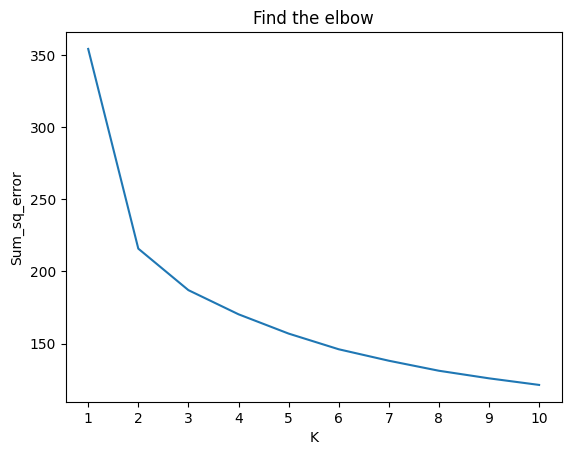

In [ ]:
plt.plot(storage.K, storage.Sum_sq_error)
plt.title('Find the elbow')
plt.xlabel('K')
plt.xticks(np.arange(min(storage.K), max(storage.K)+1, 1.0))
plt.ylabel('Sum_sq_error')

In [ ]:
#By setting k=1 as the first value of K, we can clearly see an elbow point at k=2
#Which I assume (and will seek to verify momentarily) corresponds to the natural categorisation between benign and malign

In [ ]:
breast_cancer_MSE_2 = storage.iloc[1,1]/len(breast_cancer_X_skl_norm)
breast_cancer_MSE_2

0.37932920864753683

In [ ]:
breast_cancer_2_centroids = centres[1]
breast_cancer_2_centroids

array([[0.255, 0.288, 0.247, 0.144, 0.357, 0.18 , 0.103, 0.131, 0.34 ,
        0.256, 0.064, 0.188, 0.06 , 0.029, 0.182, 0.132, 0.058, 0.181,
        0.172, 0.084, 0.205, 0.321, 0.192, 0.099, 0.357, 0.149, 0.131,
        0.262, 0.226, 0.154],
       [0.505, 0.396, 0.506, 0.364, 0.47 , 0.422, 0.418, 0.469, 0.459,
        0.299, 0.191, 0.191, 0.179, 0.131, 0.18 , 0.259, 0.125, 0.309,
        0.19 , 0.133, 0.48 , 0.451, 0.466, 0.315, 0.499, 0.364, 0.39 ,
        0.658, 0.338, 0.26 ]])

In [ ]:
#create dataframe showing how diagnoses in initial dataset map to labels from clustering

diagnosis_vs_label = pd.DataFrame({'diagnosis': breast_cancer.diagnosis, 'labels': [str(x) for x in labels[1]]})
diagnosis_vs_label

,diagnosis,labels
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
564,M,1
565,M,1
566,M,1
567,M,1


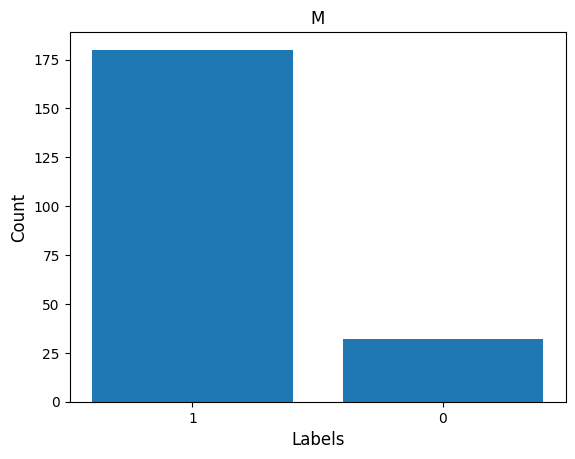

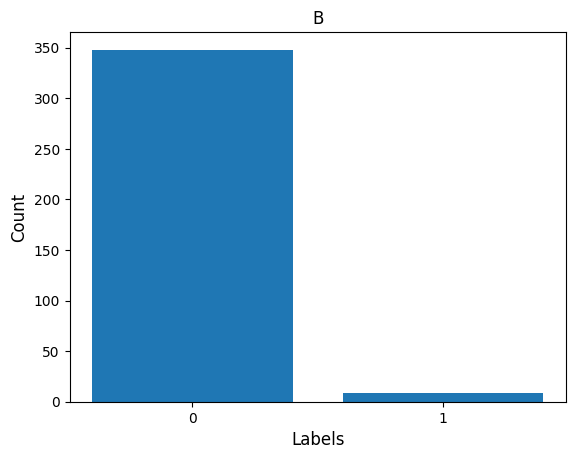

In [ ]:
diagnoses = diagnosis_vs_label.diagnosis.unique()

for diagnosis in diagnoses:

  df = diagnosis_vs_label[diagnosis_vs_label['diagnosis']== diagnosis]

  label_count  = df['labels'].value_counts()

  #plt.figure(figsize=(10,5))
  plt.bar(label_count.index, label_count.values)
  plt.title(diagnosis)
  plt.ylabel('Count', fontsize=12)
  plt.xlabel('Labels', fontsize=12)
  plt.show()

In [ ]:
#This shows that the clustering model does indeed pick up on the natural malign, benign categorisations.

#label = 1, corresponds to Malign cases (positive cases)
#label =0, corresponds to benign cases (negative cases)

#We could hence develop this clustering algorithm into a model for predicting
#whether an as of yet unseen case is benign or malign by using the centroids we've generated, and putting any new points in the cluster corresponding
#to their nearest centroid

#It is hence worth taking a moment to consider how such a model may perform
#By looking at the precision and sensitivity as seen on training data

In [ ]:
TP = np.logical_and(diagnosis_vs_label.labels == '1', diagnosis_vs_label.diagnosis == 'M').mean()
FN = np.logical_and(diagnosis_vs_label.labels == '0', diagnosis_vs_label.diagnosis == 'M').mean()

TN = np.logical_and(diagnosis_vs_label.labels == '0', diagnosis_vs_label.diagnosis == 'B').mean()
FP = np.logical_and(diagnosis_vs_label.labels == '1', diagnosis_vs_label.diagnosis == 'B').mean()

print ('TP = ' + str(TP))
print ('FN = ' + str(FN))
print ('TN = ' + str(TN))
print ('FP = ' + str(FP))


TP = 0.3163444639718805
FN = 0.056239015817223195
TN = 0.6115992970123023
FP = 0.015817223198594025


In [ ]:
#sensitivity - how good model is at picking up positive cases

TP /(TP + FN)

0.8490566037735849

In [ ]:
#Precision - how accurate are its positive predictions

TP / (TP + FP)

0.9523809523809524

In [ ]:
#This model has a very low rate of FP ("If it says a case is malign, it is very likely to be")
#But has a fairly high rate of FN ("It it says a case is benign, there is still a fair chance it is malign")

#In practice, this is unlikely to be an acceptable model as you would rather have more FP that trigger further, more advanced testing
#That let positive cases slip through unnoticed




# Clustering Breast Cancer Data with DIY Model

In [ ]:
#recall that my aim is to achieve the same centroids and MSE as sklearn, where k = 2

In [ ]:
breast_cancer_2_centroids

array([[0.255, 0.288, 0.247, 0.144, 0.357, 0.18 , 0.103, 0.131, 0.34 ,
        0.256, 0.064, 0.188, 0.06 , 0.029, 0.182, 0.132, 0.058, 0.181,
        0.172, 0.084, 0.205, 0.321, 0.192, 0.099, 0.357, 0.149, 0.131,
        0.262, 0.226, 0.154],
       [0.505, 0.396, 0.506, 0.364, 0.47 , 0.422, 0.418, 0.469, 0.459,
        0.299, 0.191, 0.191, 0.179, 0.131, 0.18 , 0.259, 0.125, 0.309,
        0.19 , 0.133, 0.48 , 0.451, 0.466, 0.315, 0.499, 0.364, 0.39 ,
        0.658, 0.338, 0.26 ]])

In [ ]:
breast_cancer_MSE_2

0.37932920864753683

In [ ]:
breast_cancer_X_DIY = breast_cancer.drop(columns = ['id', 'diagnosis'])

breast_cancer_X_DIY_norm = (breast_cancer_X_DIY - breast_cancer_X_DIY.min())/(breast_cancer_X_DIY.max()- breast_cancer_X_DIY.min())
breast_cancer_X_DIY_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
bc_DIY_1 = k_means_clustering(breast_cancer_X_DIY_norm, 2, 0.05, 20)

In [ ]:
print("DIY = " + str(bc_DIY_1[1]))

print("sklearn = "+ str(breast_cancer_MSE_2))

print("\nDIY = " + str(bc_DIY_1[2]))

print("sklearn = "+ str(breast_cancer_2_centroids))


DIY = 0.3800569284312856
sklearn = 0.37932920864753683

DIY = {'c1': array([0.52191014, 0.4016002 , 0.522828  , 0.38007319, 0.47173047,
       0.42649428, 0.4311058 , 0.4848082 , 0.46078122, 0.29140228,
       0.19875246, 0.19159101, 0.18598647, 0.13798847, 0.17983998,
       0.25615222, 0.12544944, 0.31000825, 0.19125223, 0.12818853,
       0.49755399, 0.45663816, 0.4820013 , 0.32943047, 0.49961389,
       0.36647352, 0.39746625, 0.67101682, 0.34028388, 0.25676781]), 'c2': array([0.25797434, 0.29004878, 0.24997679, 0.1456436 , 0.36116924,
       0.18812674, 0.11061595, 0.13755829, 0.34414218, 0.26119504,
       0.06597525, 0.18833368, 0.06153876, 0.02971657, 0.18167783,
       0.13874035, 0.06092002, 0.18564117, 0.17241664, 0.0879625 ,
       0.20889965, 0.32352712, 0.19626038, 0.1016519 , 0.36242735,
       0.15631539, 0.13873892, 0.27274412, 0.22967801, 0.16025084])}
sklearn = [[0.255 0.288 0.247 0.144 0.357 0.18  0.103 0.131 0.34  0.256 0.064 0.188
  0.06  0.029 0.182 0.132 0.058 0

In [ ]:
#Centroids and MSE are very close
#will try increasing rounds and decreasing MSE

In [ ]:
bc_DIY_2 = k_means_clustering(breast_cancer_X_DIY_norm, 2, 0.01, 30)

In [ ]:
print("DIY = " + str(bc_DIY_2[1]))

print("sklearn = "+ str(breast_cancer_MSE_2))

print("\nDIY = " + str(bc_DIY_2[2]))

print("sklearn = "+ str(breast_cancer_2_centroids))

DIY = 0.37943692533649304
sklearn = 0.37932920864753683

DIY = {'c2': array([0.50690839, 0.39762869, 0.50816738, 0.36596339, 0.47241837,
       0.42665461, 0.42434676, 0.47401542, 0.46140481, 0.30237903,
       0.19268612, 0.19226336, 0.18094756, 0.13230253, 0.18195501,
       0.26242219, 0.12728988, 0.31230192, 0.19190278, 0.13453117,
       0.4821006 , 0.45193868, 0.46764465, 0.31627181, 0.50110828,
       0.36710364, 0.3942696 , 0.66253735, 0.33795392, 0.26260487]), 'c1': array([0.25760299, 0.28875967, 0.24918767, 0.145689  , 0.35768159,
       0.18123962, 0.10468939, 0.13279497, 0.34051161, 0.25508594,
       0.06508085, 0.18791928, 0.06039132, 0.02934052, 0.18071952,
       0.13238917, 0.05819674, 0.18099163, 0.17156756, 0.0837819 ,
       0.2080379 , 0.32196993, 0.19495771, 0.10143276, 0.35779354,
       0.15000972, 0.13287446, 0.26541742, 0.22763139, 0.15470355])}
sklearn = [[0.255 0.288 0.247 0.144 0.357 0.18  0.103 0.131 0.34  0.256 0.064 0.188
  0.06  0.029 0.182 0.132 0.058 

In [ ]:
#Even more similar, will try one final set of hyperparameters to try to get MSE and centroid values nearly identical

bc_DIY_3 = k_means_clustering(breast_cancer_X_DIY_norm, 2, 0.005, 40)

In [ ]:
print("DIY = " + str(bc_DIY_3[1]))

print("sklearn = "+ str(breast_cancer_MSE_2))

print("\nDIY = " + str(bc_DIY_3[2]))

print("sklearn = "+ str(breast_cancer_2_centroids))

DIY = 0.37932920864753705
sklearn = 0.37932920864753683

DIY = {'c1': array([0.50483563, 0.39560329, 0.50578661, 0.36376576, 0.46988732,
       0.42226302, 0.41838662, 0.46928035, 0.45899738, 0.29945886,
       0.19093085, 0.19112073, 0.17903433, 0.13086432, 0.18017962,
       0.25890126, 0.12542475, 0.30942779, 0.190072  , 0.13266975,
       0.48047448, 0.45107371, 0.4655302 , 0.31460597, 0.49868817,
       0.36391461, 0.39027292, 0.65827197, 0.33752296, 0.26041387]), 'c2': array([0.25535358, 0.28833455, 0.24696416, 0.14388369, 0.35743076,
       0.18019471, 0.10344776, 0.1306603 , 0.34011829, 0.25591606,
       0.06427485, 0.18843043, 0.05975663, 0.02870108, 0.18158628,
       0.13242941, 0.05821528, 0.18069336, 0.17221057, 0.08403996,
       0.2052406 , 0.32069002, 0.19242138, 0.09943446, 0.3571115 ,
       0.14873935, 0.13142287, 0.26231363, 0.22639412, 0.15437354])}
sklearn = [[0.255 0.288 0.247 0.144 0.357 0.18  0.103 0.131 0.34  0.256 0.064 0.188
  0.06  0.029 0.182 0.132 0.058 

In [ ]:
#Happy with these results

In [ ]:
#Overall I am satisfied that my DIY clustering model performs K Means Clustering robustly, as demonstrated by its ability to achieve
#near identical results to the sklearn k means clustering model